In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [8]:
data_dir = 'P_COURSE_DATA/train'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       ])
    test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      ])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=64)
    return trainloader, testloader
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

['aircrafts', 'birds_', 'cars', 'dogs_', 'flowers_']


In [26]:
type(trainloader.dataset.classes)

list

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)


In [10]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 5),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [11]:
# epochs = 1
# steps = 0
# running_loss = 0
# print_every = 10
# train_losses, test_losses = [], []
# for epoch in range(epochs):
#     for inputs, labels in trainloader:
#         steps += 1
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         logps = model.forward(inputs)
#         loss = criterion(logps, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
        
#         if steps % print_every == 0:
#             test_loss = 0
#             accuracy = 0
#             model.eval()
#             with torch.no_grad():
#                 for inputs, labels in testloader:
#                     inputs, labels = inputs.to(device),labels.to(device)
#                     logps = model.forward(inputs)
#                     batch_loss = criterion(logps, labels)
#                     test_loss += batch_loss.item()
                    
#                     ps = torch.exp(logps)
#                     top_p, top_class = ps.topk(1, dim=1)
#                     equals = top_class == labels.view(*top_class.shape)
#                     accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
#             train_losses.append(running_loss/len(trainloader))
#             test_losses.append(test_loss/len(testloader))                    
#             print(f"Epoch {epoch+1}/{epochs}.. "
#                   f"Train loss: {running_loss/print_every:.3f}.. "
#                   f"Test loss: {test_loss/len(testloader):.3f}.. "
#                   f"Test accuracy: {accuracy/len(testloader):.3f}")
#             running_loss = 0
#             model.train()
# torch.save(model, 'coarse_model.pth')

Epoch 1/1.. Train loss: 1.807.. Test loss: 0.404.. Test accuracy: 0.869
Epoch 1/1.. Train loss: 0.154.. Test loss: 0.059.. Test accuracy: 0.984
Epoch 1/1.. Train loss: 0.043.. Test loss: 0.028.. Test accuracy: 0.992


In [13]:
# epochs = 5
# steps = 0
# running_loss = 0
# print_every = 30
# train_losses, test_losses = [], []
# for epoch in range(epochs):
#     for inputs, labels in trainloader:
#         steps += 1
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         logps = model.forward(inputs)
#         loss = criterion(logps, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
        
#         if steps % print_every == 0:
#             test_loss = 0
#             accuracy = 0
#             model.eval()
#             with torch.no_grad():
#                 for inputs, labels in testloader:
#                     inputs, labels = inputs.to(device),labels.to(device)
#                     logps = model.forward(inputs)
#                     batch_loss = criterion(logps, labels)
#                     test_loss += batch_loss.item()
                    
#                     ps = torch.exp(logps)
#                     top_p, top_class = ps.topk(1, dim=1)
#                     equals = top_class == labels.view(*top_class.shape)
#                     accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
#             train_losses.append(running_loss/len(trainloader))
#             test_losses.append(test_loss/len(testloader))                    
#             print(f"Epoch {epoch+1}/{epochs}.. "
#                   f"Train loss: {running_loss/print_every:.3f}.. "
#                   f"Test loss: {test_loss/len(testloader):.3f}.. "
#                   f"Test accuracy: {accuracy/len(testloader):.3f}")
#             running_loss = 0
#             model.train()
# torch.save(model, 'coarse_model.pth')

Epoch 1/5.. Train loss: 0.039.. Test loss: 0.024.. Test accuracy: 0.992
Epoch 2/5.. Train loss: 0.035.. Test loss: 0.015.. Test accuracy: 0.994
Epoch 3/5.. Train loss: 0.043.. Test loss: 0.026.. Test accuracy: 0.992
Epoch 4/5.. Train loss: 0.026.. Test loss: 0.008.. Test accuracy: 0.996
Epoch 5/5.. Train loss: 0.011.. Test loss: 0.040.. Test accuracy: 0.990


In [68]:
data_dir = 'test'
test_transforms = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),
                                      transforms.ToTensor()
                                     ])

In [69]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('coarse_model.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [70]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    inp = image_tensor
    inp = inp.to(device)
    output = model(inp)
    ps = torch.exp(output)
    index = output.data.cpu().numpy().argmax()
    return index,ps

In [71]:
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
#     indices = list(range(len(data)))
#     np.random.shuffle(indices)
#     idx = indices[:num]
#     from torch.utils.data.sampler import SubsetRandomSampler
#     sampler =  idx  #SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

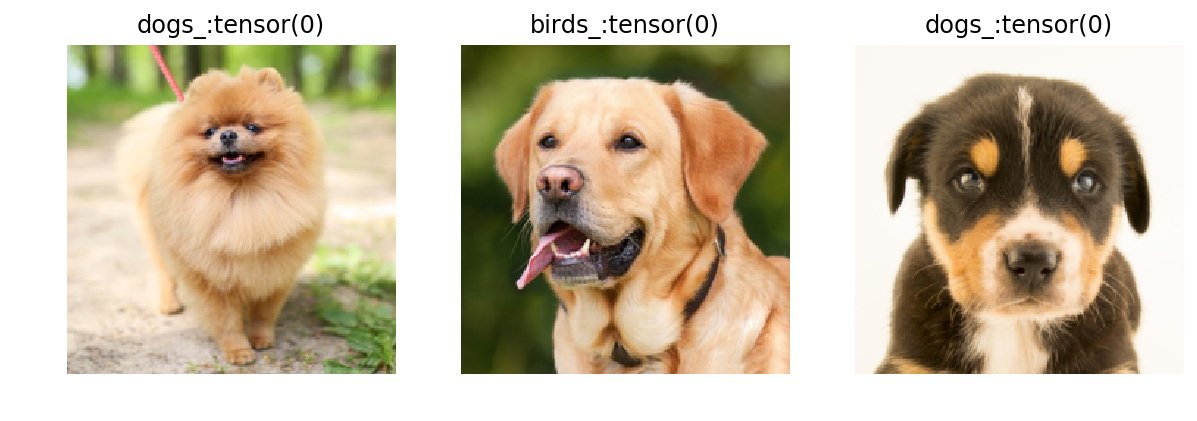

In [73]:
to_pil = transforms.ToPILImage()
images,_ = get_random_images(10)
fig=plt.figure(figsize=(10,10))
probs = []
for ii in range(len(images)):
    image = to_pil(images[ii])
    index,ps = predict_image(image)
    probs.append(ps)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = labels[ii]
    sub.set_title(str(trainloader.dataset.classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()